###EDA

In [ ]:
df['fraud'].value_counts()

,count
fraud,
0.0,912597
1.0,87403


Majority of the transactions are labelld as non-fraudulent.

In [ ]:
#Check the distribution of categories for all other categorical columns
for col in df.columns:
  if col in ['repeat_retailer','used_chip','used_pin_number','online_order']:
    print(df[col].value_counts())
    print("\n")

repeat_retailer
1.0    881536
0.0    118464
Name: count, dtype: int64


used_chip
0.0    649601
1.0    350399
Name: count, dtype: int64


used_pin_number
0.0    899392
1.0    100608
Name: count, dtype: int64


online_order
1.0    650552
0.0    349448
Name: count, dtype: int64




In [ ]:
df['fraud'].mean()

np.float64(0.087403)

Rate of Fraud = 8.7%

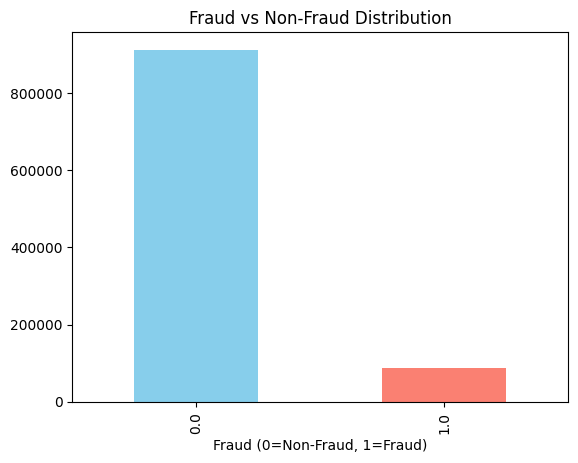

In [ ]:
#Plot Fraud Distribution
df['fraud'].value_counts().plot(kind='bar',color=['skyblue','salmon'])
plt.title('Fraud vs Non-Fraud Distribution')
plt.xlabel('Fraud (0=Non-Fraud, 1=Fraud)')
plt.show()

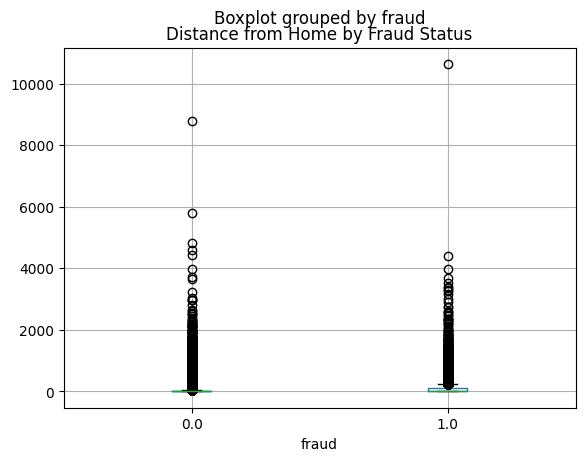

In [ ]:
#Distance from home by fraud
df.boxplot(column='distance_from_home',by='fraud')
plt.title('Distance from Home by Fraud Status')
plt.grid(True)
plt.show()

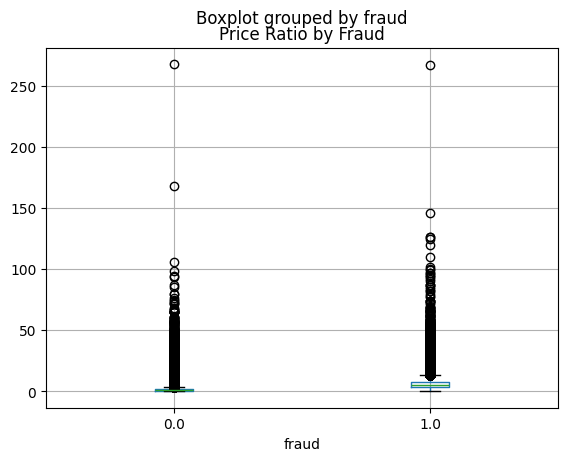

In [ ]:
#Price Ratio by fraud
df.boxplot(column='ratio_to_median_purchase_price',by='fraud')
plt.title('Price Ratio by Fraud')
plt.grid(True)
plt.show()

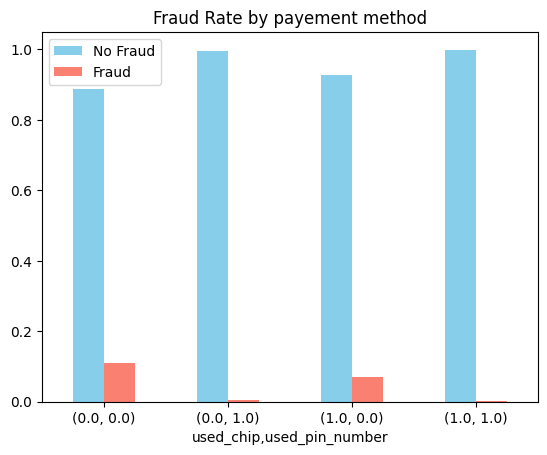

In [ ]:
#Transaction method analysis
method_fraud = pd.crosstab([df['used_chip'],df['used_pin_number']],df['fraud'],normalize='index')
method_fraud.plot(kind='bar',color=['skyblue','salmon'])
plt.title('Fraud Rate by payement method')
plt.xticks(rotation=0)
plt.legend(['No Fraud','Fraud'])

Fraud cases mostly occur when:
* No chip used , no pin number used
* chip is used, but pin number is not used

Fraud cases tend to lower when:
* chip is not used, pin number is used
* both chip and pin numbers are not used

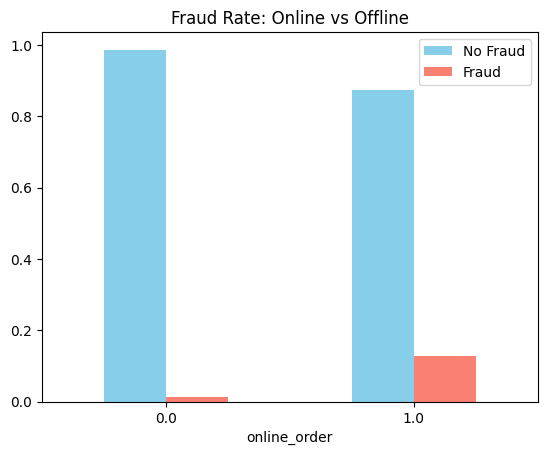

In [ ]:
#Online vs Offline
online_fraud = pd.crosstab(df['online_order'],df['fraud'],normalize='index')
online_fraud.plot(kind='bar',color=['skyblue','salmon'])
plt.title('Fraud Rate: Online vs Offline')
plt.xticks(rotation=0)
plt.legend(['No Fraud', 'Fraud'])
plt.show()

Online transactions show more instances of being fraud

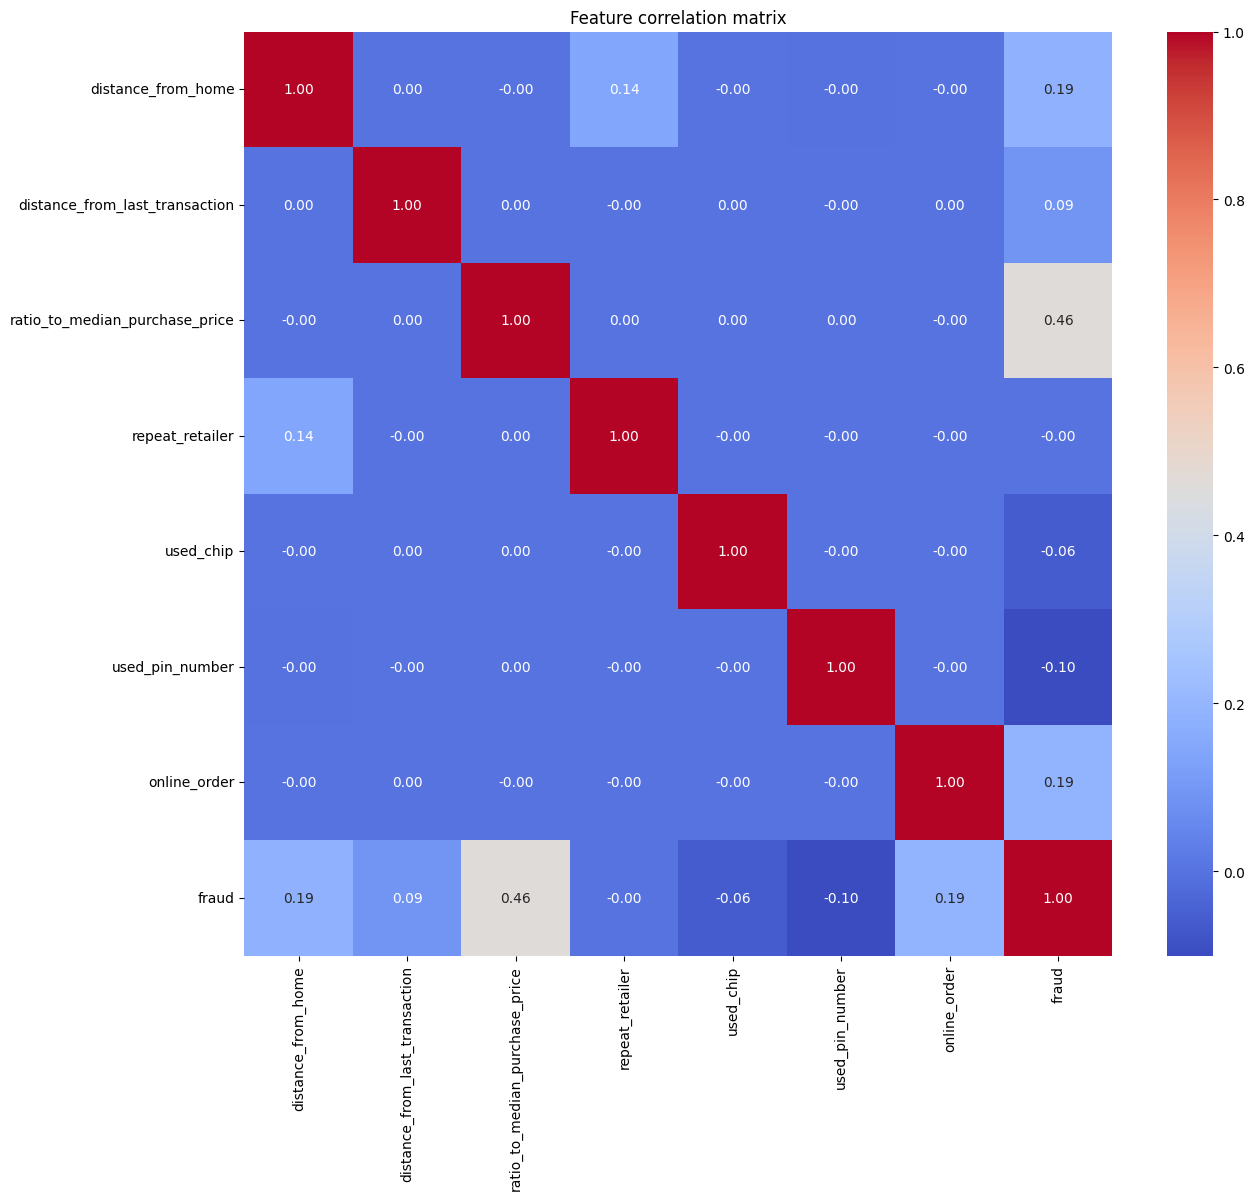

In [ ]:
#Correlation heatmap
plt.figure(figsize=(14,12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Feature correlation matrix')
plt.show()

In [ ]:
#Summarizing key insights

df.groupby('fraud').agg({
    'distance_from_home': 'mean',
    'ratio_to_median_purchase_price': 'mean',
    'online_order': 'mean',
    'repeat_retailer': 'mean'
}).round(3)

,distance_from_home,ratio_to_median_purchase_price,online_order,repeat_retailer
fraud,,,,
0.0,22.833,1.424,0.622,0.882
1.0,66.262,6.006,0.946,0.880


* Fraud transactions have more distance from home.
* Transaction price to user's median purchase price of transaction history is higher in fraudulent transactions compared to non-fraudulent transactions
* both fraud and non-fraud transactions are equal for repeat and new retailers
* online orders have higher chances of being fraud